# Twitter developer API tweet count endpoint

The number of tweets you can extract from the Twitter developer API each month is capped depending on the level of access you have. The tweet count endpoint is useful for understanding how many tweets are going to be returned based on the query that you've created. This does not affect your monthly tweet cap. 

In [1]:
import requests
import os
import json
import pandas as pd

Each project on the Twitter developer API has associated keys and tokens which allow you to connect to the API. 

In [2]:
with open('credentials.json', 'r') as json_file:
    cred = json.load(json_file)
bearer_token = cred["BEARER_TOKEN"]

In [3]:
def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """
    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2RecentTweetCountsPython"
    return r

Select the URL for the twitter API endpoint that we want to connect to

In [4]:
search_url = "https://api.twitter.com/2/tweets/counts/recent"

Set up our query, here we are looking for tweets containing the word 'climate' (note that the API is case insensitive, however there is an option to make case sensitive). We are filtering by language, to only get tweets in English and we are filtering out any retweets (so we don't get lots of duplicated tweets). We can also indiciate the granularity of the counts that we went returned, the default is hours. 

In [5]:
query_params = {'query': '(climate change OR #climatechange) lang:en -is:retweet','granularity': 'hour'}

In [6]:
def connect_to_endpoint(url, params):
    response = requests.request("GET", search_url, auth=bearer_oauth, params=params)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

200


<AxesSubplot:>

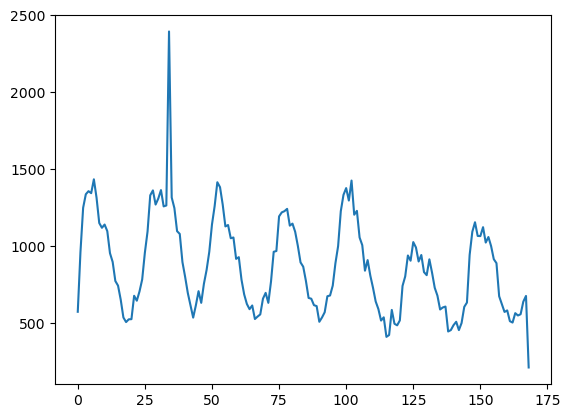

In [7]:
json_response = connect_to_endpoint(search_url, query_params)
counts = pd.DataFrame(json_response['data'])
counts.tweet_count.plot()

In [8]:
counts.sort_values('tweet_count', ascending=False).head()

,end,start,tweet_count
34,2022-08-16T21:00:00.000Z,2022-08-16T20:00:00.000Z,2396
6,2022-08-15T17:00:00.000Z,2022-08-15T16:00:00.000Z,1435
102,2022-08-19T17:00:00.000Z,2022-08-19T16:00:00.000Z,1427
52,2022-08-17T15:00:00.000Z,2022-08-17T14:00:00.000Z,1416
53,2022-08-17T16:00:00.000Z,2022-08-17T15:00:00.000Z,1384
